In [19]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from fastrbm.dataset import load_dataset
from fastrbm.plot import plot_PCA, plot_image

In [38]:
# use LaTeX fonts in the plots
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 15})
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

In [4]:
dataset_name = "MICKEY"
train_dataset, test_dataset = load_dataset("MICKEY", variable_type="Ising")

In [25]:
model_name = "../RCM.h5"
trial_name = "best_trial"


with h5py.File(model_name, "r") as f:
    intrinsic_dimension = f["hyperparameters"]["intrinsic_dimension"][()]
    train_ll = np.array(f[trial_name]["train_ll"])
    test_ll = np.array(f[trial_name]["train_ll"])
    U = np.array(f["const"]["U"]).T
    num_trials = np.array(f["num_trial"]).item()
    samples_gen = np.array(f[trial_name]["samples_gen"])
    m = np.array(f["const"]["m"])
    pdm = np.array(f[trial_name]["pdm"])


Text(0.5, 1.0, 'Log-Likelihood of the RCM.')

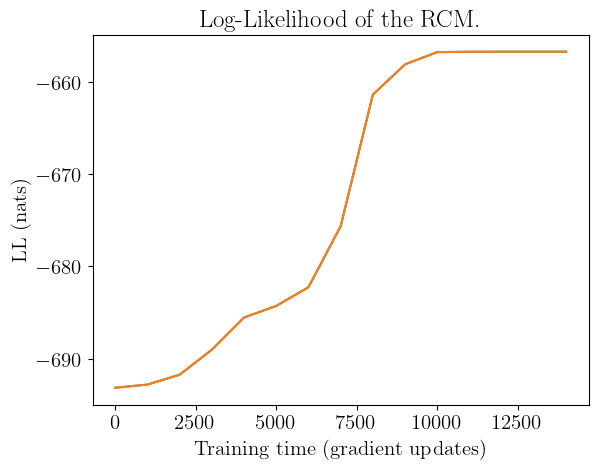

In [39]:
x = (np.arange(train_ll.shape[0]))*1000
fig, ax = plt.subplots(1,1)
ax.plot(x, train_ll, label = "Train")
ax.plot(x, test_ll, label = "Test")
ax.set_xlabel("Training time (gradient updates)")
ax.set_ylabel("LL (nats)")
ax.set_title("Log-Likelihood of the RCM.")

We can compare the generated data vs the dataset on the dimensions learned by the RCM

In [40]:
proj_data = train_dataset.data @ U / U.shape[0]**.5
proj_gen = samples_gen @ U / U.shape[0]**.5

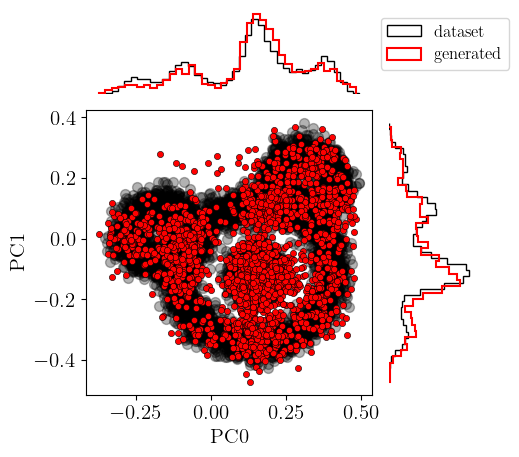

In [41]:
intrinsic_dimension = 2
if intrinsic_dimension == 1:
    fig, ax = plt.subplots(1, 1)
    ax.hist(proj_data[:,0], histtype="step", color="black", bins=80, density=True)
    ax.hist(proj_gen[:,0], histtype="step", color="red", bins=80, density=True)
    ax.set_xlabel("PC0")
else:
    for i in range(0, intrinsic_dimension-1):
        plot_PCA(proj_data, proj_gen, labels=["dataset", "generated"], dir1=i, dir2=i+1)

In [23]:
if dataset_name == "MNIST":
    plot_image(samples_gen, shape=(28,28), grid_size=(10, 10), show_grid=False)